# Programming Exercise 3: Multi-Class Classification

We'll be using the output from the previous exercise. Logistic Regression with regularizaton

In [18]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from multiClassClassification import *

# Optimization module in scipy
# from scipy import optimize

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Loading and parsing data from a Matlab file

In [19]:
data = loadmat('ex3data1.mat')
# This loads all the information on a dictonary
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}


In [20]:
# Looking at the dictionary keys
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [21]:
# We can access the contents of each dictionary key as an array
data['__header__']

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011'

In [22]:
# Having a look at the dataset
data['X'], data['y']

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8))

In [23]:
# Convert the data into a numpy array
X = data['X']
y = data['y'].flatten()

y should be made of values from 0-9. However, as matlab does not have 0 index, the value is replaced by 10.
We'll normalize the 10 value back to 0, so it matches the 0 digit.

In [24]:
y = np.where(y == 10, 0, y)
# Another way to do it
# y[y == 10] = 0

In [25]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [26]:
# m = number of training examples
# n = number of features
(m,n) = X.shape

## Visualizing the data

We'll visualize 100 random data points from the training set.

In [27]:
# We get a 100 random datapoints. First we get a 100 indices out of m
rand_indices = np.random.choice(m, 100, replace=False)
# Second, we load these random vectors in the sel array
sel = X[rand_indices, :]

<function matplotlib.pyplot.show(close=None, block=None)>

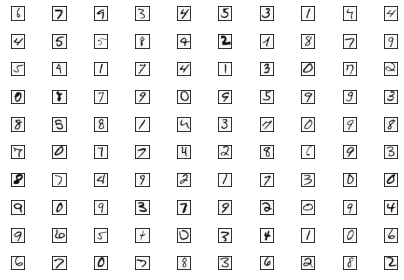

In [28]:
fig, ax = plt.subplots(nrows=10, ncols=10, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(100):
    img = sel[i].reshape(20,20).T
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show

## Vectorized logistic regression

In [29]:
# test values for the parameters theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# test values for the inputs
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# test values for the labels
y_t = np.array([1, 0, 1, 0, 1])

# test value for the regularization parameter
lambda_t = 3

In [30]:
J, grad = costFunction(theta_t, X_t, y_t, lambda_t)

print('Cost         : {:.6f}'.format(J))
print('Expected cost: 2.534819')
print('-----------------------')
print('Gradients:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Expected gradients:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Cost         : 2.534819
Expected cost: 2.534819
-----------------------
Gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]
Expected gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]


## One-vs-All Classification

In [31]:
lmbd = 0.1
num_labels = 10
all_theta, all_cost = oneVsAll(X, y, num_labels, lmbd)

In [32]:
pred = predictOneVsAll(all_theta, X)

In [33]:
print('\nTraining Set Accuracy: {:.2f} %'.format(np.mean(pred == y) * 100));


Training Set Accuracy: 96.46 %
